In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')

In [3]:
trainSet = trainSet.drop(["PassengerId","Ticket","Name"],axis=1)
testSet = testSet.drop(["Name","Ticket"],axis=1)

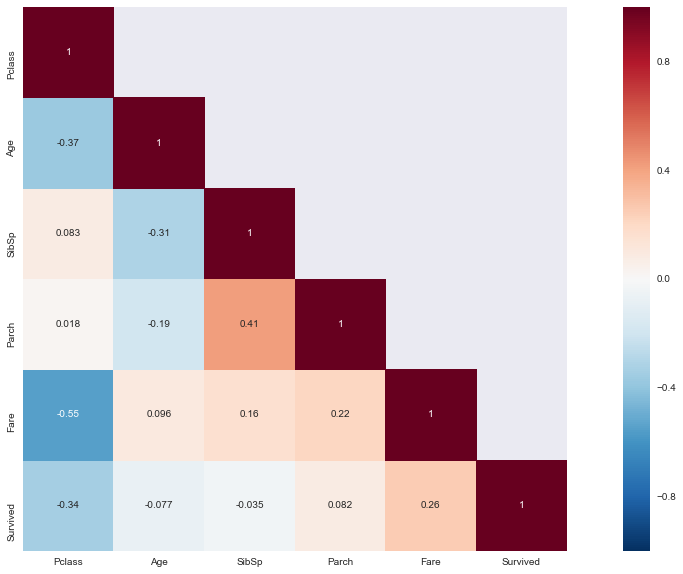

In [4]:
df1 = trainSet.drop(['Survived'],axis=1)
df1['Survived']=trainSet['Survived']
df1 = df1.corr()
mask = np.array(df1)
mask[np.tril_indices_from(mask)]=False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data=df1,mask=mask,annot=True,square=True)

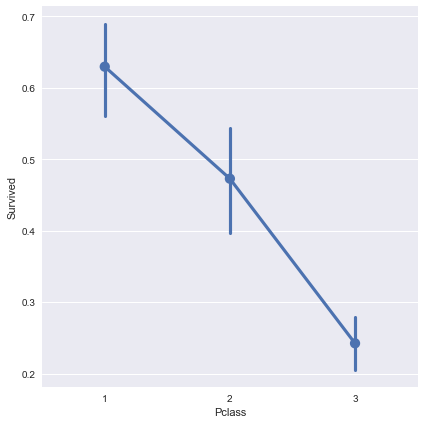

In [5]:
sns.factorplot(x='Pclass',y='Survived',data=trainSet,order=[1,2,3],size=6)

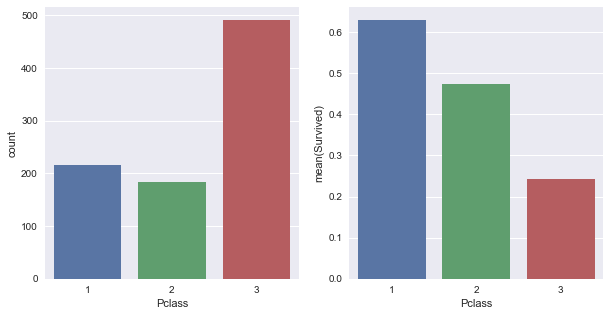

In [6]:
cls_df = trainSet[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
plt.figure(1,(10,5))
plt.subplot(121)
sns.countplot(x="Pclass",data=trainSet)
plt.subplot(122)
sns.barplot(x="Pclass",y="Survived",data=cls_df)

In [7]:
# one-hot encoding 
dummy_columns = ['Class_1','Class_2','Class_3']
dummy_class_trainSet = pd.get_dummies(trainSet['Pclass'])
dummy_class_trainSet.columns = dummy_columns
dummy_class_testSet = pd.get_dummies(testSet['Pclass'])
dummy_class_testSet.columns = dummy_columns


trainSet = trainSet.drop(['Pclass'],axis=1)
testSet = testSet.drop(['Pclass'],axis=1)

trainSet = trainSet.join(dummy_class_trainSet)
testSet = testSet.join(dummy_class_testSet)

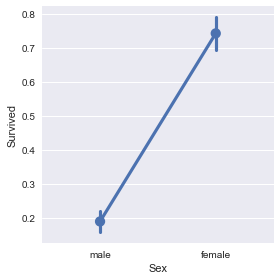

In [8]:
sns.factorplot(x='Sex',y='Survived',data=trainSet,size=4)

C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


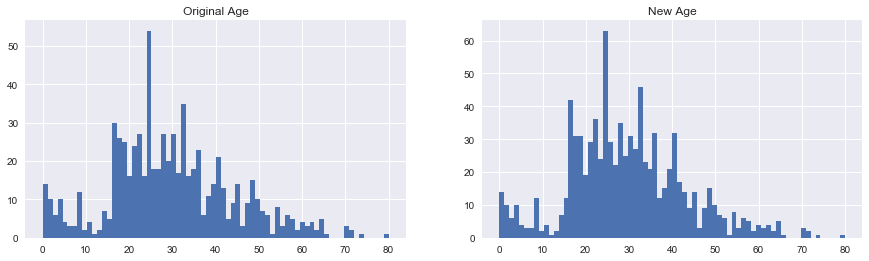

In [9]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age')
axis2.set_title('New Age')

age_std_train = trainSet['Age'].std()
age_mean_train = trainSet['Age'].mean()
size = trainSet['Age'].isnull().sum()
trainSet['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

fillvalues_train=np.random.randint(age_mean_train-age_std_train,age_mean_train+age_std_train,size=size)
trainSet['Age'][np.isnan(trainSet['Age'])] = fillvalues_train
trainSet['Age'] = trainSet['Age'].astype(int)
trainSet['Age'].hist(bins=70,ax=axis2)

age_std_test=testSet['Age'].std()
age_mean_test=testSet['Age'].mean()
size=testSet['Age'].isnull().sum()
fillvalues_test=np.random.randint(age_mean_test-age_std_test,age_mean_test+age_std_test,size=size)
testSet['Age'][np.isnan(testSet['Age'])] = fillvalues_test
testSet['Age'] = testSet['Age'].astype(int)

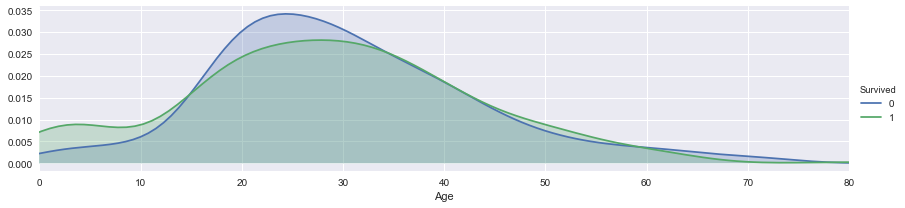

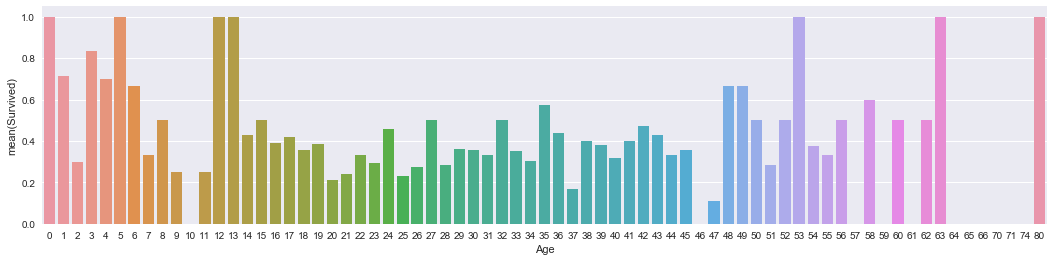

In [10]:
facet = sns.FacetGrid(trainSet,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,trainSet['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
age = trainSet[['Age','Survived']]
average_age = age.groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

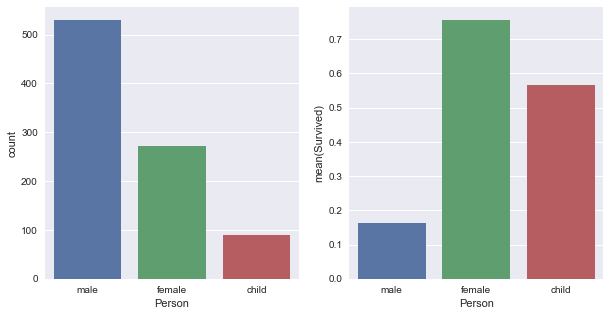

In [11]:
def get_person(person):
    age,sex = person
    return 'child' if age < 16 else sex
trainSet['Person'] = trainSet[['Age','Sex']].apply(get_person,axis=1)
testSet['Person'] = testSet[['Age','Sex']].apply(get_person,axis=1)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person',data=trainSet,ax=axis1)
person = trainSet[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person,ax=axis2,order=['male','female','child'])

In [12]:
#one-hot encoding
dummy_columns = ['Child','Female','Male']
dummy_person_train = pd.get_dummies(trainSet['Person'])
dummy_person_train.columns=dummy_columns
dummy_person_test = pd.get_dummies(testSet['Person'])
dummy_person_test.columns=dummy_columns
trainSet = trainSet.join(dummy_person_train)
testSet = testSet.join(dummy_person_test)

trainSet.drop(['Sex'],axis=1,inplace=True)
testSet.drop(['Sex'],axis=1,inplace=True)

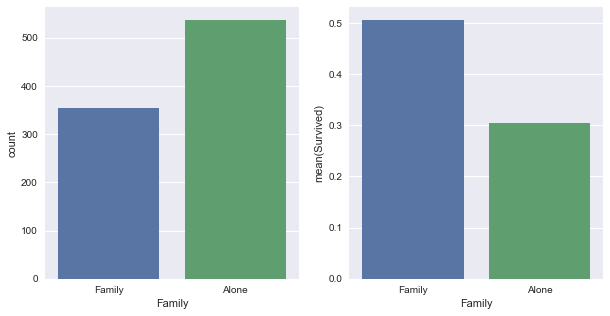

In [13]:
# 'SibSp'and'Parch'

def family(data):
    SibSp,Parch = data
    return 1 if (SibSp >0 or Parch >0) else 0

trainSet['Family'] = trainSet[['SibSp','Parch']].apply(family,axis=1)
testSet['Family'] = testSet[['SibSp','Parch']].apply(family,axis=1)
fig,(axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))                      
sns.countplot(x='Family',data=trainSet,order=[1,0],ax=axis1)
family = trainSet[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=family,ax=axis2,order=[1,0])
axis1.set_xticklabels(['Family','Alone'])

trainSet.drop(['SibSp','Parch'],axis=1,inplace=True)
testSet.drop(['SibSp','Parch'],axis=1,inplace=True)

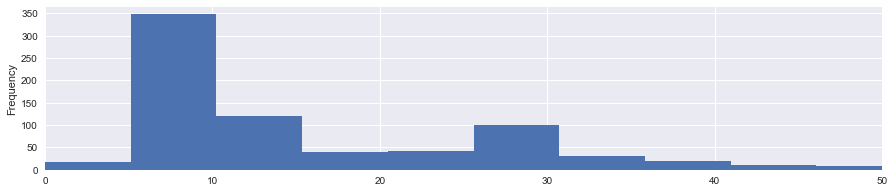

In [14]:
# fare

testSet['Fare'].fillna(testSet['Fare'].median(),inplace=True)

trainSet['Fare'] = trainSet['Fare'].astype(int)
testSet['Fare'] = testSet['Fare'].astype(int)

trainSet['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))

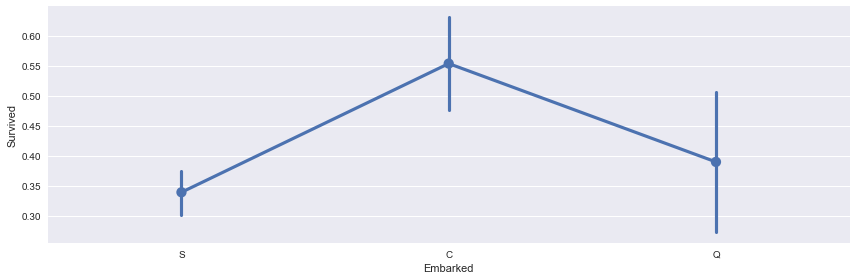

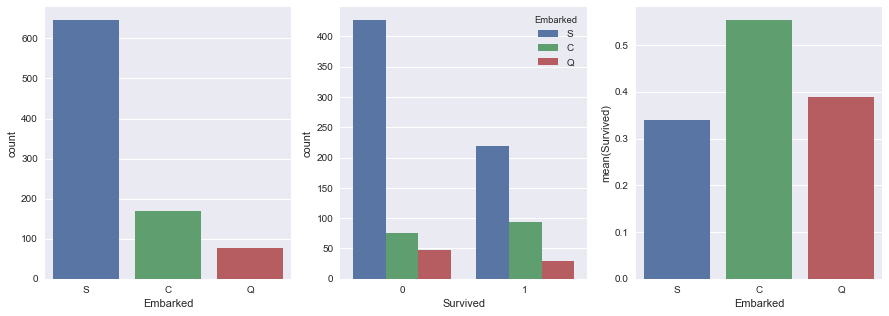

In [15]:
#embarked
trainSet['Embarked'].fillna('S',inplace=True)
sns.factorplot(x='Embarked',y='Survived',data=trainSet,size=4,aspect=3)
fig, (axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked',data=trainSet,ax=axis1)
sns.countplot(x='Survived',hue='Embarked',data=trainSet,ax=axis2)
embark=trainSet[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked',y='Survived',data=embark,ax=axis3,order=['S','C','Q'])

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
test = trainSet['Embarked']
a = LabelEncoder().fit_transform(test.values)
b = OneHotEncoder(sparse=False).fit_transform(a.reshape(-1, 1))
df_embarked = pd.DataFrame(b,columns=['C','Q','S'])
trainSet = trainSet.join(df_embarked)
trainSet.drop(['Embarked'],axis=1,inplace=True)

In [17]:
trainSet['C']=trainSet['C'].astype(int)
trainSet['S']=trainSet['S'].astype(int)
trainSet['Q']=trainSet['Q'].astype(int)
trainSet.drop(['Cabin','Person'],axis=1,inplace=True)

test = testSet['Embarked']
a = LabelEncoder().fit_transform(test.values)
b = OneHotEncoder(sparse=False).fit_transform(a.reshape(-1, 1))
df_embarked = pd.DataFrame(b,columns=['C','Q','S'])
testSet = testSet.join(df_embarked)
testSet.drop(['Embarked','Cabin','Person'],axis=1,inplace=True)
testSet['C']=testSet['C'].astype(int)
testSet['S']=testSet['S'].astype(int)
testSet['Q']=testSet['Q'].astype(int)

In [18]:
"""
from sklearn.preprocessing import StandardScaler
trainSet['Age'] = StandardScaler().fit_transform(trainSet['Age'].values.reshape(-1,1))
trainSet['Fare'] = StandardScaler().fit_transform(trainSet['Fare'].values.reshape(-1,1))

testSet['Age'] = StandardScaler().fit_transform(testSet['Age'].values.reshape(-1,1))
testSet['Fare'] = StandardScaler().fit_transform(testSet['Fare'].values.reshape(-1,1))
"""

"\nfrom sklearn.preprocessing import StandardScaler\ntrainSet['Age'] = StandardScaler().fit_transform(trainSet['Age'].values.reshape(-1,1))\ntrainSet['Fare'] = StandardScaler().fit_transform(trainSet['Fare'].values.reshape(-1,1))\n\ntestSet['Age'] = StandardScaler().fit_transform(testSet['Age'].values.reshape(-1,1))\ntestSet['Fare'] = StandardScaler().fit_transform(testSet['Fare'].values.reshape(-1,1))\n"

In [19]:
X_train = trainSet.drop('Survived',axis=1)
y_train = trainSet['Survived']
X_test = testSet.drop('PassengerId',axis=1).copy()

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import accuracy_score

C:\Users\Zishi\Anaconda3\lib\json\encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-23 21:50:11.894372. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
clf =XGBClassifier(learning_rate=0.1, max_depth=2, 
silent=True, objective='binary:logistic')

param_test = {
    'n_estimators': range(30, 50, 2),
    'max_depth': range(2, 7, 1)
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_test, 
scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

C:\Users\Zishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81033, std: 0.03014, params: {'max_depth': 2, 'n_estimators': 30},
  mean: 0.81257, std: 0.02649, params: {'max_depth': 2, 'n_estimators': 32},
  mean: 0.81257, std: 0.02649, params: {'max_depth': 2, 'n_estimators': 34},
  mean: 0.81145, std: 0.02610, params: {'max_depth': 2, 'n_estimators': 36},
  mean: 0.80471, std: 0.02619, params: {'max_depth': 2, 'n_estimators': 38},
  mean: 0.80696, std: 0.02836, params: {'max_depth': 2, 'n_estimators': 40},
  mean: 0.80584, std: 0.02815, params: {'max_depth': 2, 'n_estimators': 42},
  mean: 0.80696, std: 0.02836, params: {'max_depth': 2, 'n_estimators': 44},
  mean: 0.80584, std: 0.02670, params: {'max_depth': 2, 'n_estimators': 46},
  mean: 0.80471, std: 0.02744, params: {'max_depth': 2, 'n_estimators': 48},
  mean: 0.81033, std: 0.01343, params: {'max_depth': 3, 'n_estimators': 30},
  mean: 0.81145, std: 0.01275, params: {'max_depth': 3, 'n_estimators': 32},
  mean: 0.80584, std: 0.02036, params: {'max_depth': 3, 'n_estimators': 34},

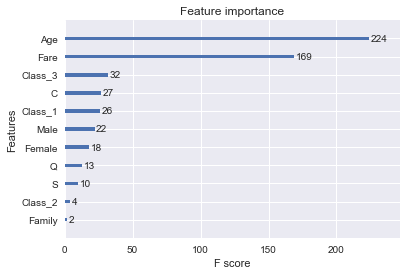

In [25]:
from xgboost import plot_importance
bst = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators = 44,
silent=True, objective='binary:logistic')
bst.fit(X_train,y_train)

plot_importance(bst)
plt.show()

In [26]:
pred = bst.predict(X_test)

In [27]:
submission = pd.DataFrame({
    'PassengerId':testSet['PassengerId'],
    'Survived':pred
})
submission.to_csv('titanicbst.csv',index=False)